In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/obed/Downloads/insurance (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
## Display the number of columns and rows
df.shape
print(f'There are {df.shape [0]} rows and {df.shape [1]} columns in the dataset.')

There are 1338 rows and 7 columns in the dataset.


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Missing Values

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are zero missing values in this dataset which is good.

## Duplicates

In [8]:
#Check for duplicates
print(f'There are {df.duplicated().sum()} duplicates')

There are 1 duplicates


In [9]:
# Check data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# Check for impossible values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observations:

- **Age**: The dataset covers individuals with ages ranging from 18 to 64, with a mean age of approximately 39 years. The standard deviation indicates that there is some variability in the ages of the individuals in the dataset.
- **BMI (Body Mass Index)**: The BMI values range from 15.96 to 53.13, with a mean BMI of around 30.66. This means that at least 50% of the people fall intot he overweight or obese category. 
- **Children**: The number of children ranges from 0 to 5, with an average of approximately 1.09 children per individual.
- **Charges (Insurance Costs)**: Insurance charges vary considerably, with costs ranging from $1,121.87 to $63,770.43. The mean insurance cost is approximately $13,270.42, and a median value of $9382.03.


In [11]:
# categorizing individuals based on their BMI and age

def bmi_catg(x):
    if x < 18.5:
        return 'Under Weight'
    elif x>=18.5 and x<=24.9:
        return 'Normal Weight'
    elif x>=25 and x<=29.9:
        return 'Overweight'
    else:
        return 'Obese'

def age_catg(x):
    if x <= 35:
        return 'Young Adult'
    elif x>=36 and x<=55:
        return 'Senior Adult'
    else:
        return 'Elder'
    

df['Weight_status'] = df['bmi'].apply(bmi_catg)
df['Age_status'] = df['age'].apply(age_catg)
df.head()

,age,sex,bmi,children,smoker,region,charges,Weight_status,Age_status
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult


## EDA

In [12]:
# seperating categorical columns from the numerical columns
cat_cols = ['sex', 'smoker', 'region', 'Weight_status', 'Age_status', 'children']
num_cols = ['age', 'bmi', 'charges']


# cat_cols = df.select_dtypes(include=object).columns
# num_cols = df.select_dtypes(exclude=object).columns

print('categorical-columns:', cat_cols)
print('numeric-columns:',num_cols)

categorical-columns: ['sex', 'smoker', 'region', 'Weight_status', 'Age_status', 'children']
numeric-columns: ['age', 'bmi', 'charges']


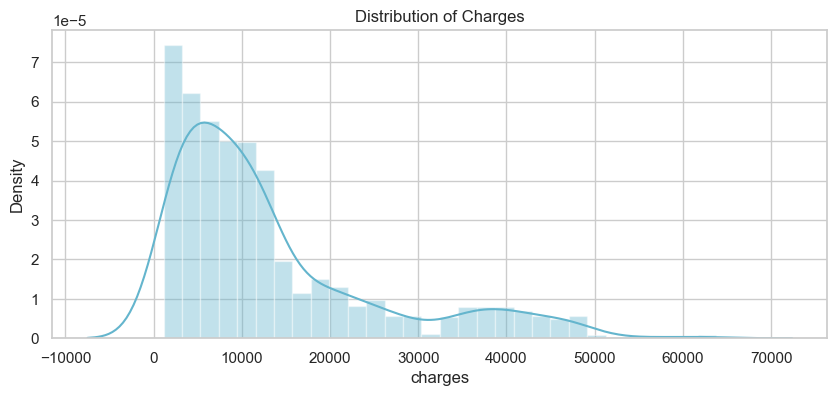

In [13]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 4))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges');

- The graph shows that most of the insurance charges in the dataset are relatively low, with a large number of individuals having lower costs. However, there are also a smaller number of individuals who incur significantly higher charges.

- The fact that the distribution is skewed to the right indicates that there are relatively few instances of very high charges compared to the larger number of instances with lower charges. This understanding is essential for analyzing risk, pricing policies, and resource allocation within the context of insurance or financial management.

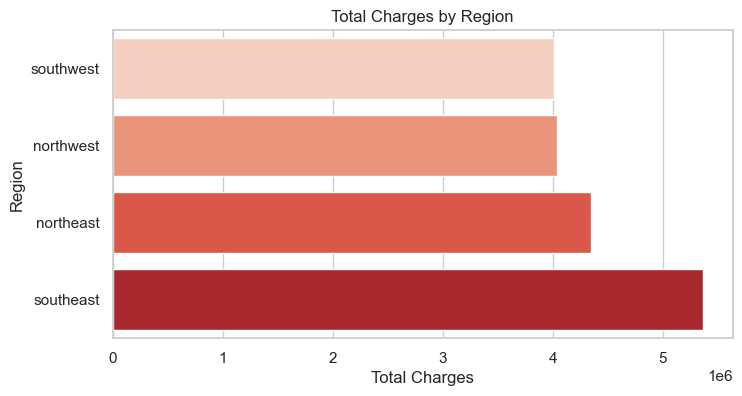

In [14]:
# Looking at the charges by region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=charges.values, y=charges.index, palette='Reds')

plt.xlabel('Total Charges')
plt.ylabel('Region')
plt.title('Total Charges by Region')

plt.show()

- Overall the highest medical charges are in the Southeast and the lowest are also in the Southwest.

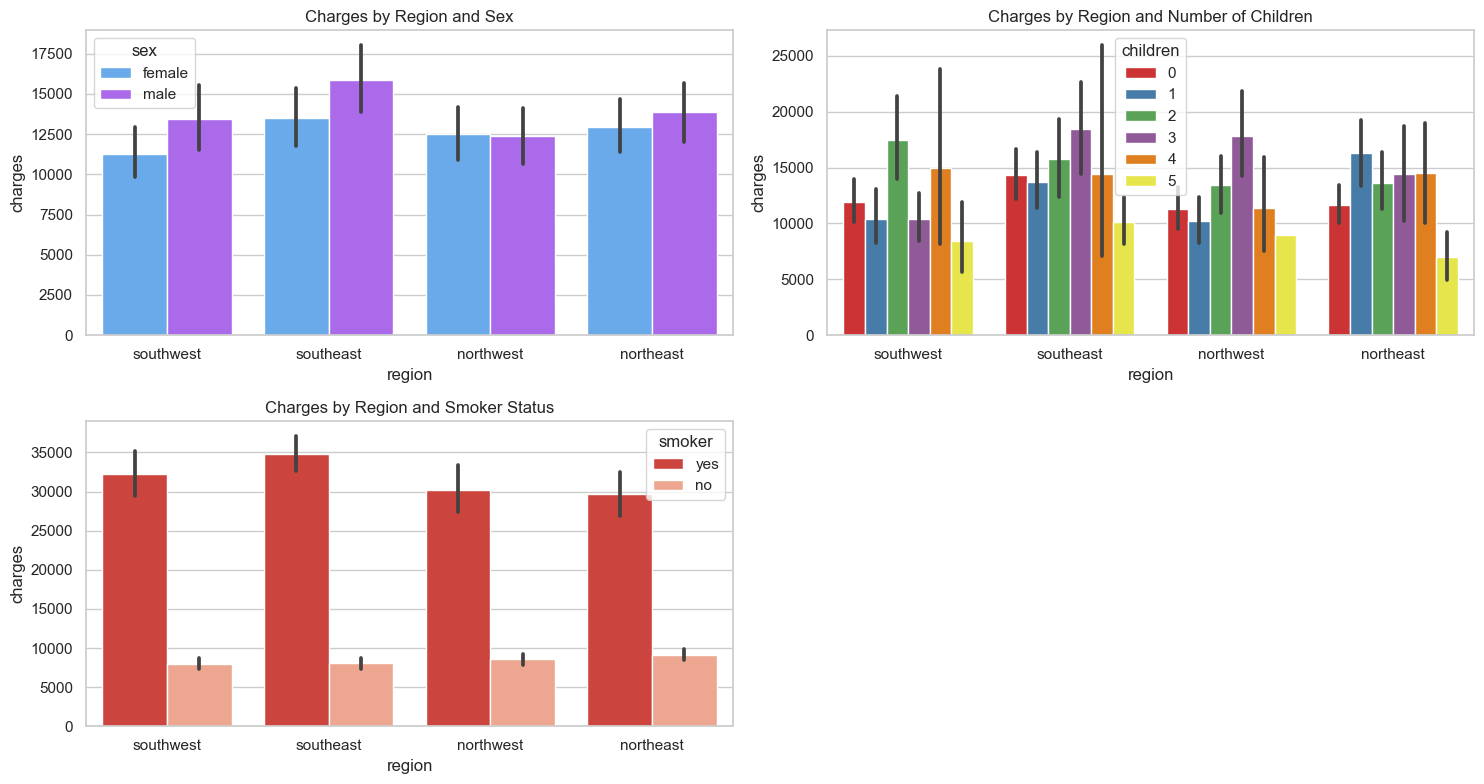

In [15]:
# Set up the figure and axes
plt.figure(figsize=(15, 8))

# Plot for charges by region and sex
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool', ax=plt.subplot(2, 2, 1))
plt.title('Charges by Region and Sex')

# Plot for charges by region and number of children
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1', ax=plt.subplot(2, 2, 2))
plt.title('Charges by Region and Number of Children')

# Plot for charges by region and smoker status
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r', ax=plt.subplot(2, 2, 3))
plt.title('Charges by Region and Smoker Status')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


- *The highest charges due to smoking are in the southeast still, while the lowest are in the northeast.*

1. **Highest Charges Due to Smoking in the Southeast**:
Individuals in the Southeast region tend to have the highest insurance charges, particularly among smokers. Despite higher smoking rates in the Southwest, the Southeast region consistently exhibits higher charges, indicating other factors influencing insurance costs in this region.

2. **Gender Disparities in Charges by Region**:
In regions like the Northeast, gender seems to play a significant role in insurance charges, with females generally incurring higher costs compared to males. However, in regions like the Southwest and Northwest, gender disparities in charges are less pronounced.

3. **Regional Variations in Smoking Rates**:
While smoking rates are higher in the Southwest compared to the Northeast, insurance charges attributed to smoking are not consistently higher in regions with higher smoking prevalence. This suggests that other factors beyond smoking contribute significantly to insurance charges.

4. **Impact of Children on Medical Costs**:
Individuals with children tend to have higher medical costs overall, irrespective of the region. This indicates that the number of children is a contributing factor to increased insurance charges, possibly due to higher healthcare needs for families.

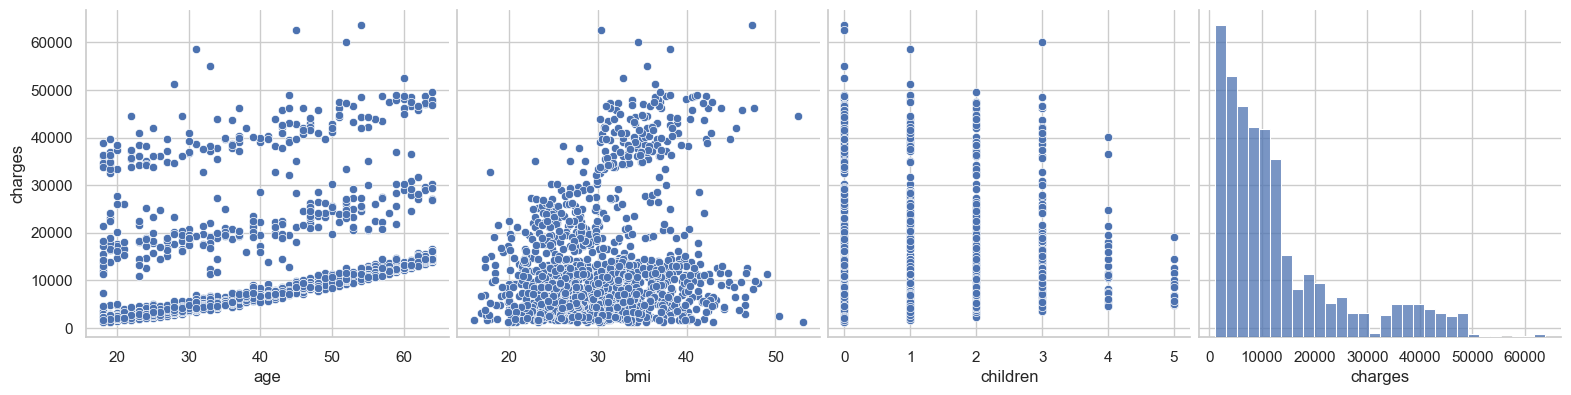

In [16]:
sns.pairplot(df,y_vars=['charges'], height=4)
plt.show()

Plotting every numerical feature, with charges separated by various categorical features
Separation by sex:


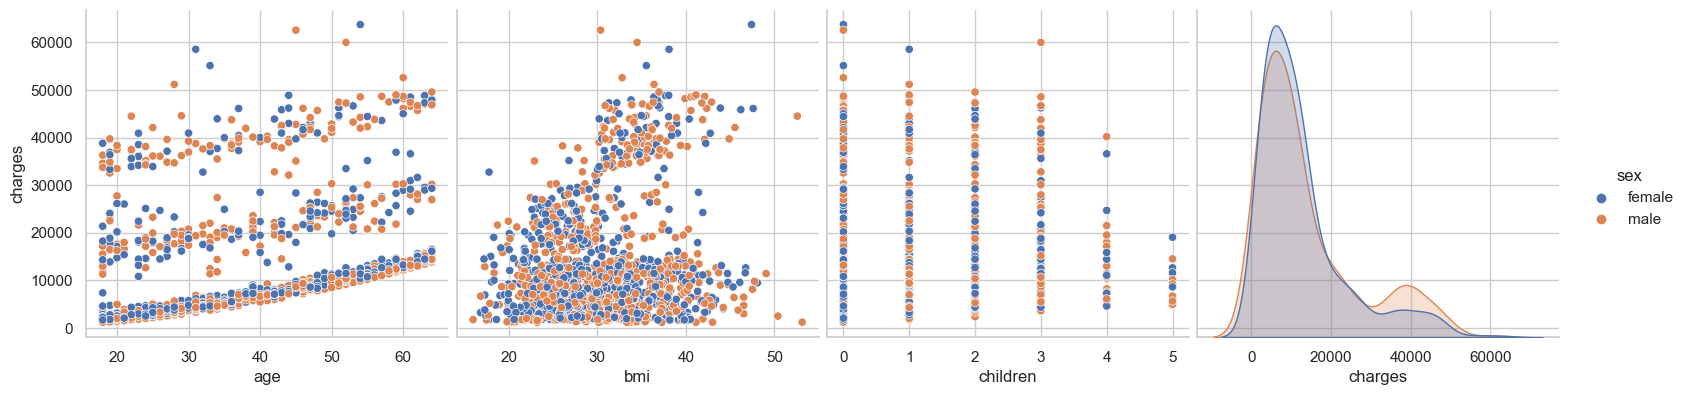

Separation by smoker:


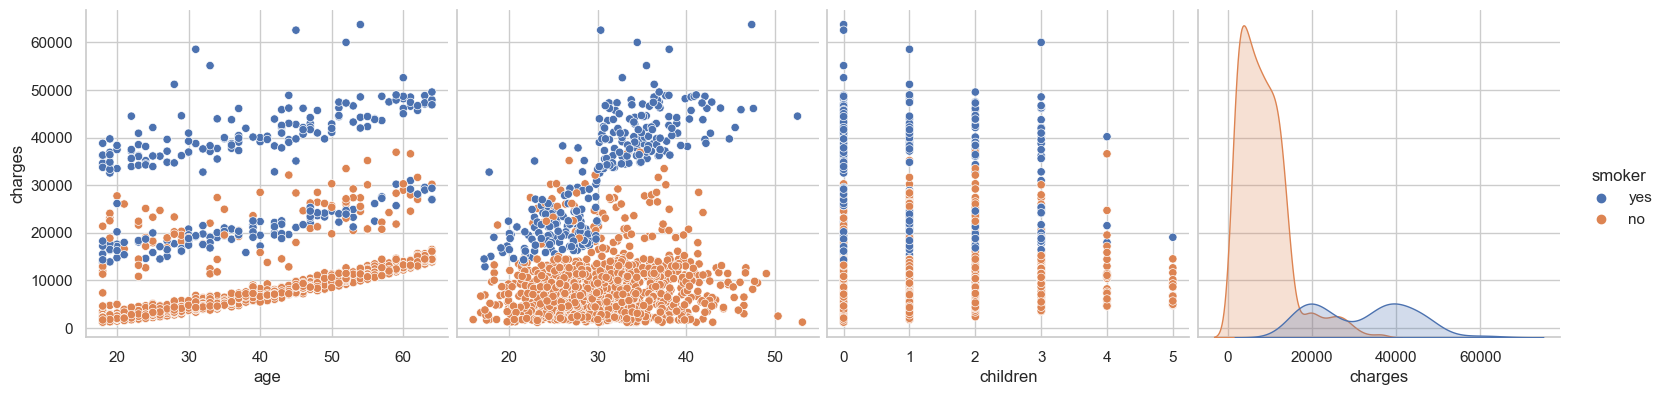

Separation by region:


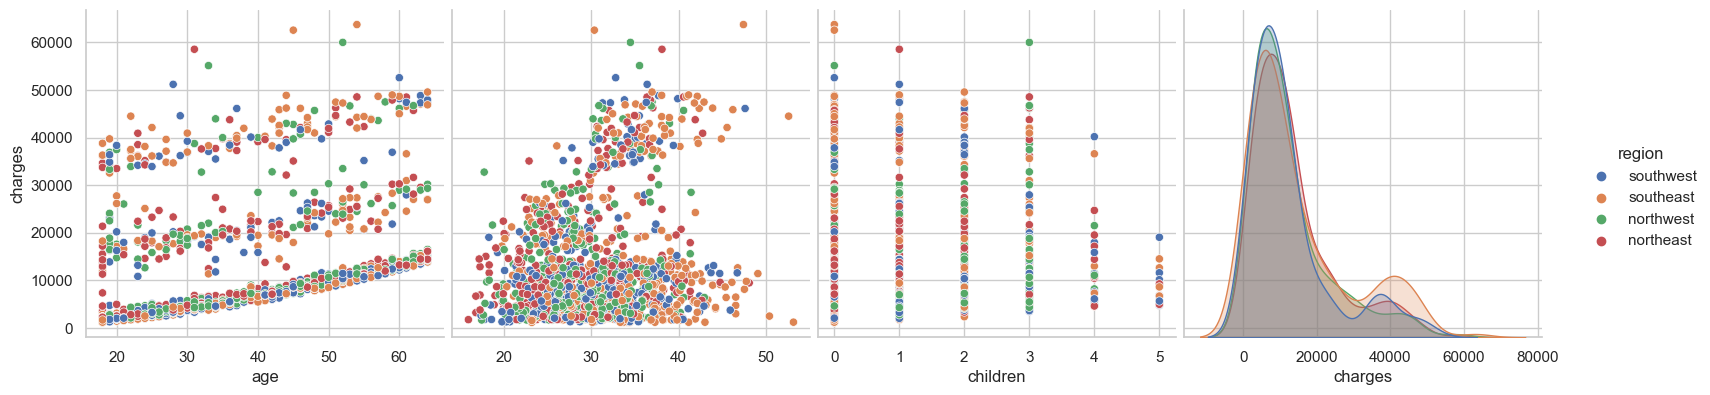

Separation by Weight_status:


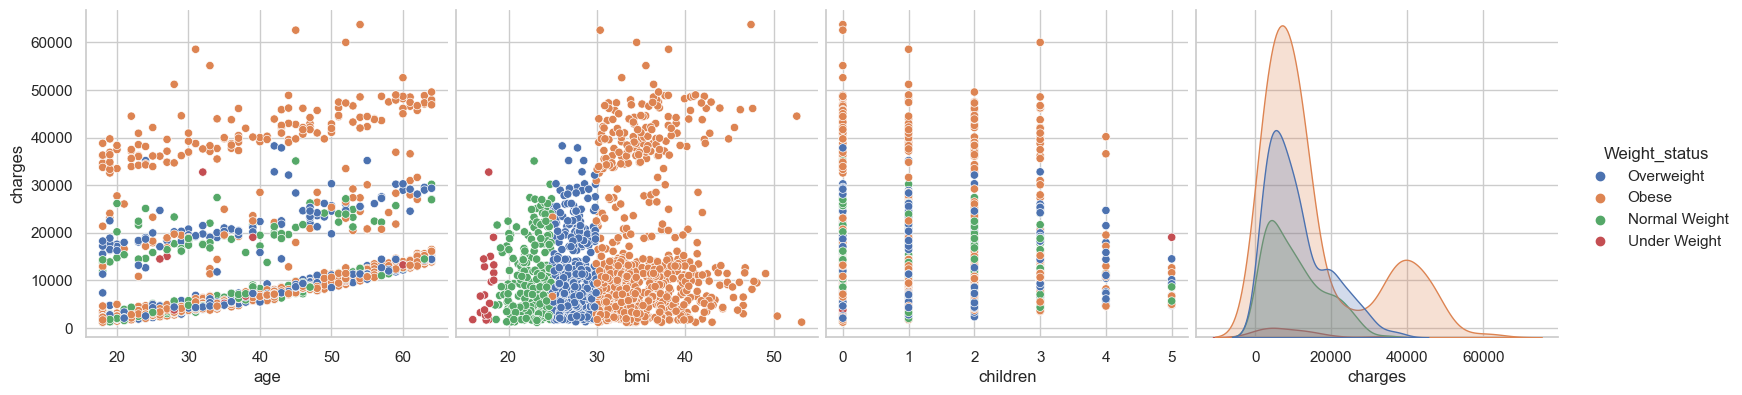

Separation by Age_status:


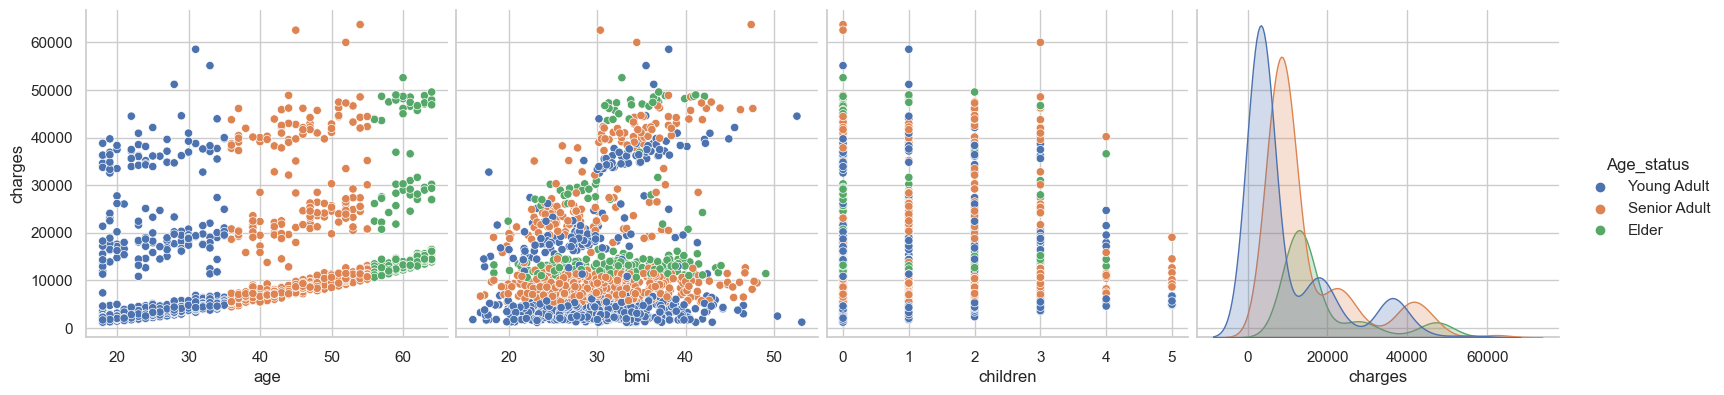

In [17]:
print('Plotting every numerical feature, with charges separated by various categorical features')

for col in cat_cols[:-1]:
    print('Separation by {}:'.format(col))
    sns.pairplot(df, y_vars=['charges'], hue=col, height=4)
    plt.show()


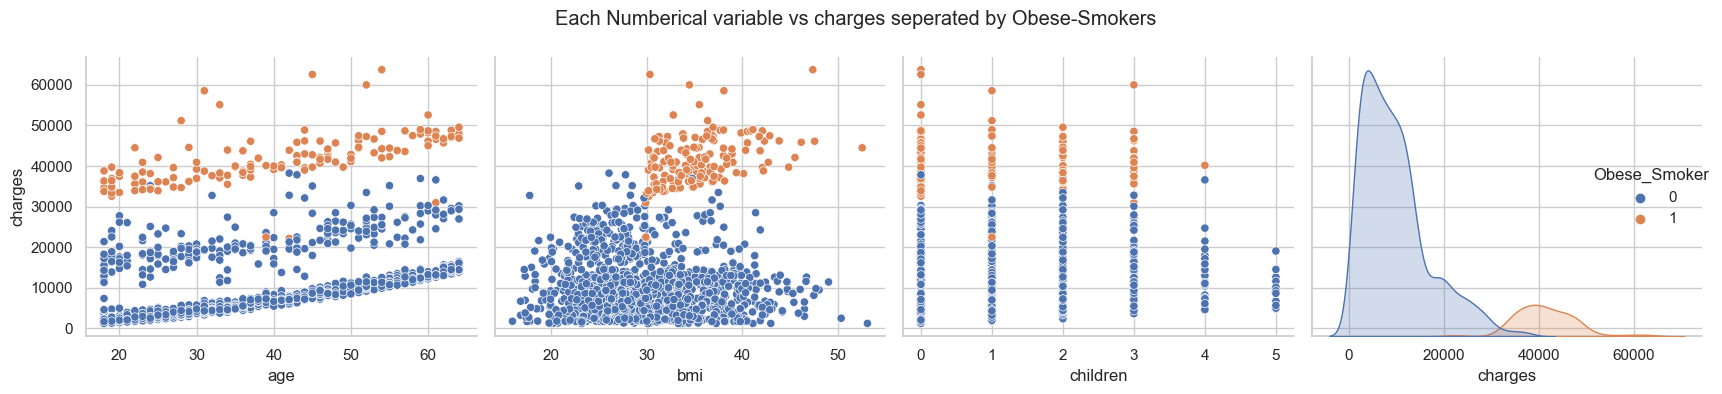

In [18]:
# taking a closer look at obese smokers

df['Obese_Smoker'] = np.zeros(df.shape[0]).astype(int)
df.loc[(df['smoker'] == 'yes') & (df['Weight_status'] == 'Obese'), 'Obese_Smoker'] = 1

sns.pairplot(df,y_vars=['charges'], height=4, hue='Obese_Smoker')
plt.suptitle('Each Numberical variable vs charges seperated by Obese-Smokers')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Obese_Smoker')

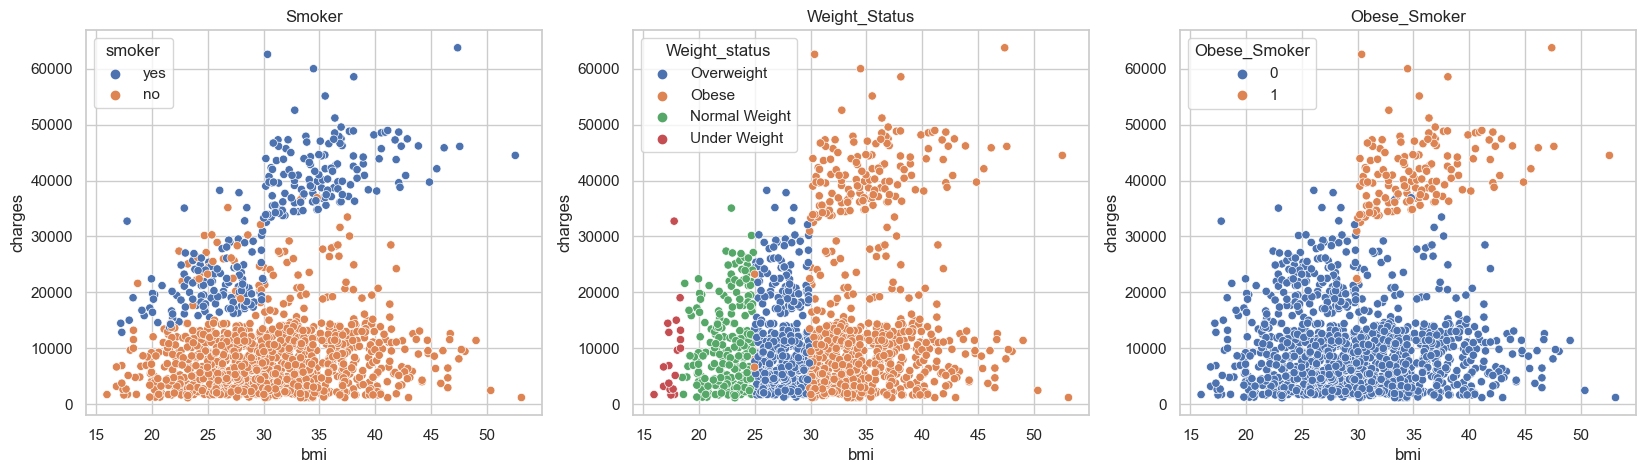

In [19]:
# the following plot shows the same behavior

plt.figure(1, figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Smoker')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='Weight_status')
plt.title('Weight_Status')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='bmi', y='charges', hue='Obese_Smoker')
plt.title('Obese_Smoker')

- The scatterplot shows a noticeable trend of Obese individuals and smokers exhibit the highest amount of charges of medical services compared to the other geroup of individuals. This subgroup stands out distinctly from the rest of the observations, suggesting a strong association between obesity, smoking, and elevated medical charges.

## **Hypothesis Testing**

In [20]:
# printing out the first 5 of the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges,Weight_status,Age_status,Obese_Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult,0
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult,0
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adult,0
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Young Adult,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult,0


### Q1. **Do Smokers Have Higher Charges Than Non-Smokers?**

#### **State Hypotheses**:

    Null Hypothesis: There is no difference in charges between smokers and non-smokers.

    Alternate Hypothesis: Charges are higher for smokers than non-smokers.

    Alpha: We will be using an alpha=.05

#### **Select Test**:
I will be using the 2-sample T-test since my comparison is between 2 samples/groups, "smokers and non-smokers".

#### **Test Assumptions**:
- No significant outliers
- Normality
- Equal Variance

In [21]:
# see how many smokers and non smokers we have
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
# Split the data into two groups
smoker_charges = df.loc[df['smoker'] == 'yes', "charges"]
non_smoker_charges = df.loc[df['smoker'] == 'no', "charges"]

#### **Checking Test Assumption**

In [23]:
# Check for outliers in smokers
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

- There are no outliers in the smokers column

In [24]:
# Check for outliers in non-smokers
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
np.sum(outliers_non_smoker)

24

In [25]:
# Remove outliers for non-smokers column
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [26]:
# Normality test: smokers
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [27]:
# Normality test: non-smokers
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- both normality tests suggest that the data under consideration is not normally distributed, we can proceed since our sample sizes are sufficient.

In [28]:
# Equal variance test
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- The p-value obtained from the Levene's test is significantly smaller than the significance level (0.05), indicating strong evidence against the null hypothesis.
- Therefore, we reject the null hypothesis that the variances of the samples are equal across groups.
- We would proceed to executing our test. We just need to be sure to include **"equal_var = False"** when we perform our t-test.

#### **Executing Test**

In [29]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

#### **Interpretation**

- Based on the t-test result, we can conclude that there is sufficient evidence to support the alternative hypothesis. It suggests that there is a statistically significant difference in insurance charges between smokers and non-smokers, with charges being higher for smokers.

#### **Supporting Visualization**

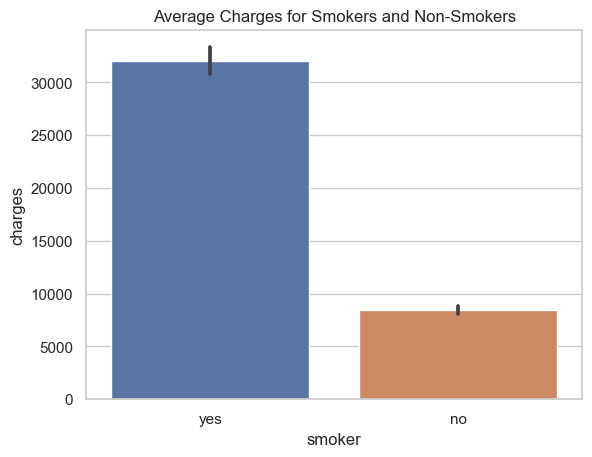

In [30]:
# Visual showing differences in average charges between both groups
ax = sns.barplot(data= df, x= 'smoker', y='charges')
ax.set_title('Average Charges for Smokers and Non-Smokers');

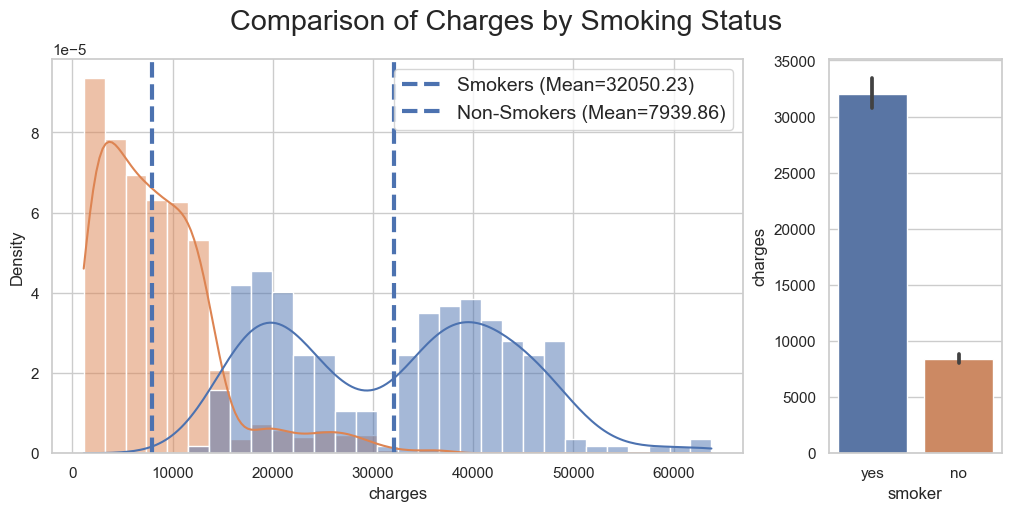

In [31]:
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})")

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smoker_charges):.2f})")

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,)
fig.suptitle('Comparison of Charges by Smoking Status',fontsize='xx-large');

### Q2. **Smoking impacts Medical Charges**

#### **State Hypotheses**:

    Null Hypothesis: There is no difference in the charges for smokers. It doesn't have any impact.

    Alternate Hypothesis: Smoking has a good amount of impact on the charges

    Alpha: We will be using an alpha=.05

#### **Select Test**:
I will be using the ANOVA T-test since my comparison is between more than 2 groups, "smokers and non-smokers", and "charges".

#### **Test Assumptions**:
- No significant outliers
- Equal variance
- Normality

In [32]:
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

#### **Normality test**

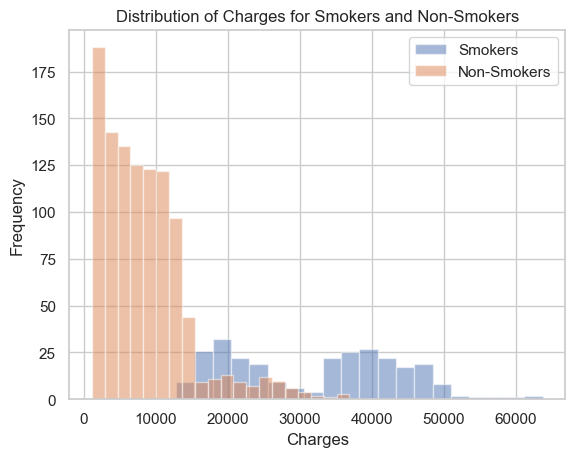

In [33]:
# Using histograms to see if the distributions are approximately bell-shaped.

# Plot histograms
plt.hist(smoker_charges, bins=20, alpha=0.5, label='Smokers')
plt.hist(non_smoker_charges, bins=20, alpha=0.5, label='Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.legend()
plt.show()


Text(0.5, 0.98, 'Checking Normality Assumption for Smokers and Non-Smokers')

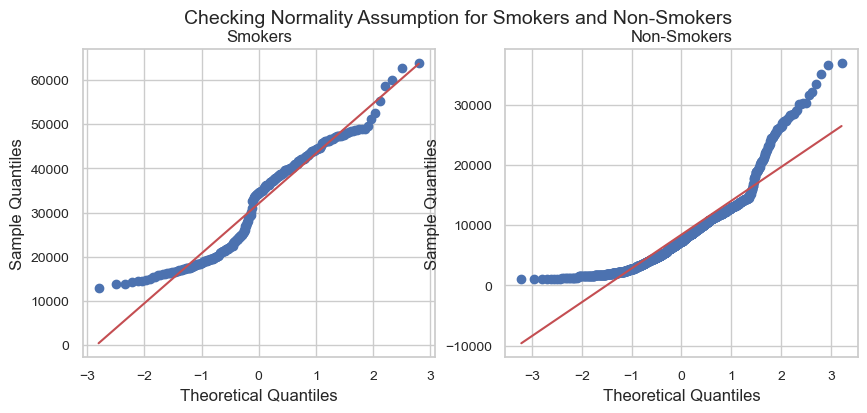

In [34]:
# Create a new figure with adjusted size
plt.figure(figsize=(10, 4))

# Create the first subplot for smokers
plt.subplot(1, 2, 1)
stats.probplot(smoker_charges, dist="norm", plot=plt)
plt.title('Smokers')
plt.grid(True)  # Add grid lines
plt.xlabel('Theoretical Quantiles', fontsize=12)  
plt.ylabel('Sample Quantiles', fontsize=12)        
plt.tick_params(labelsize=10)                       

# Create the second subplot for non-smokers
plt.subplot(1, 2, 2)
stats.probplot(non_smoker_charges, dist="norm", plot=plt)
plt.title('Non-Smokers')
plt.grid(True)  # Add grid lines
plt.xlabel('Theoretical Quantiles', fontsize=12)  
plt.ylabel('Sample Quantiles', fontsize=12)        
plt.tick_params(labelsize=10)                       

# Add a common title for the entire figure
plt.suptitle('Checking Normality Assumption for Smokers and Non-Smokers', fontsize=14)



- The examination of the data distributions visually shows that they closely resemble normal distributions, which's necessary for performing a t test. This discovery implies that the data follows a bell shaped curve. With this in mind we can confidently move forward with conducting a t test knowing that the assumption of normality has been met. This particular step is essential, to guaranteeing the accuracy and dependability of our analysis.


In [35]:
# Using Levene's test to assess whether the variances among the groups (smokers and non-smokers) are approximately equal.

# Perform Levene's test
statistic, p_value = levene(smoker_charges, non_smoker_charges)

# Print the results
print("Levene's Test Statistic:", statistic)
print("p-value:", p_value)

Levene's Test Statistic: 332.6135162726081
p-value: 1.5593284881803726e-66


- The study shows proof that the average medical expenses, for smokersre notably higher compared to those, for non smokers. This finding backs the argument that smoking leads to increased healthcare costs.

### Q3 **Do different regions have different charges, on average?**

#### **State Hypotheses**:
    Null Hypothesis: There are no differences in average charges by regions.

    Alternate Hypothesis: There are differences in average charges by region.

    Alpha: We will be using an alpha=.05

#### **Select Test**:
- I will be using the one-way ANOVA test since my comparison is between multiple samples/groups.

#### **Test Assumptions**:
- No significant outliers
- Equal variance
- Normality

In [36]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [37]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [38]:
### checking whether the p-values in the DataFrame are less than 0.05 (95% confidence level)
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


**Interpretation**:

- Our tests show that they're not normally distributed. However, we can proceed since our sample sizes are sufficient.
- In all regions, the p-values are extremely small, much smaller than the chosen significance level of 0.05. Therefore, we reject the null hypothesis for each region. This suggests strong evidence to conclude that there are differences in average charges across different regions.
- In other words, there are significant variations in the average charges for health insurance based on geographical regions.

In [39]:
# Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- The Levene's test assesses the equality of variances among different groups. In this case, the small p-value (0.0008610590250786703) indicates that there is strong evidence against the null hypothesis of equal variances.
- Therefore, we reject the null hypothesis and conclude that there are significant differences in variances among the groups.

In [40]:
# ExecuteKruskal Wallis test
result = stats.kruskal(*groups)
result

KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

**Interpretation**:
- The p-value obtained from the Kruskal-Wallis test is greater than the chosen significance level (0.05).
- Since the p-value is not statistically significant, we fail to reject the null hypothesis.
- Consequently, there is insufficient evidence to conclude that there are significant differences in population medians among the groups.
In other words, based on the Kruskal-Wallis test results, we cannot reject the hypothesis that the groups have equal medians.

#### **Supporting Visual**:

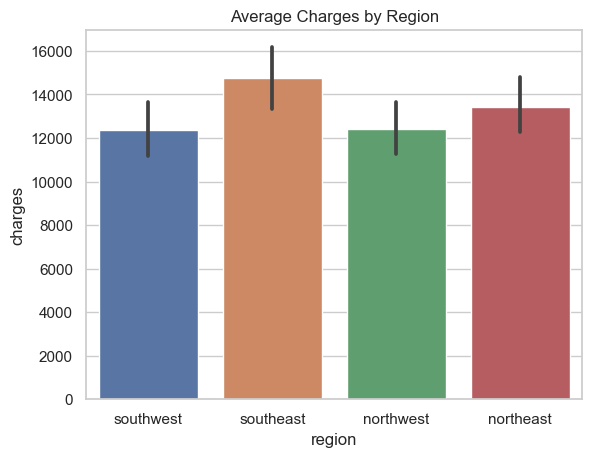

In [41]:
ax = sns.barplot(data=df, x='region',y='charges')
ax.set_title('Average Charges by Region');